In [3]:
# Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import os
from collections import defaultdict
import numpy as np

In [4]:
if os.path.exists('df_concat.csv'):
    df_concat = pd.read_csv('df_concat.csv')
else:
    df_agoraphobia = pd.read_csv('data/agoraphobia/cohort.tsv', sep='\t', header=0)
    df_anxiety = pd.read_csv('data/anxiety/cohort.tsv', sep='\t', header=0)
    df_depression = pd.read_csv('data/depression/cohort.tsv', sep='\t', header=0)
    df_dysthymia = pd.read_csv('data/dysthymia/cohort.tsv', sep='\t', header=0)
    df_GAD = pd.read_csv('data/GAD/cohort.tsv', sep='\t', header=0)
    df_OCD = pd.read_csv('data/OCD/cohort.tsv', sep='\t', header=0)
    df_panic = pd.read_csv('data/panic/cohort.tsv', sep='\t', header=0)
    df_PDD = pd.read_csv('data/PDD/cohort.tsv', sep='\t', header=0)
    df_phobia = pd.read_csv('data/phobia/cohort.tsv', sep='\t', header=0)
    df_SAD = pd.read_csv('data/SAD/cohort.tsv', sep='\t', header=0)
    # Combine different cohort datasets
    dataframes = [df_agoraphobia, df_anxiety, df_depression, df_dysthymia, df_GAD, df_OCD, df_panic, df_PDD, df_phobia, df_SAD]
    df_concat = pd.concat(dataframes)
    # Create comorbidities dataframe
    comorbidities = []

    with open("data/comorbidities.txt", "r") as f:
        for line in f:
            line = line.strip()
            if line:  # Skip empty lines
                parts = [p.strip() for p in line.split("=")]
                comorbidities.append(parts)

    df_comorbidities = pd.DataFrame(comorbidities[1:])
    df_comorbidities["user_concat"] = df_comorbidities.apply(lambda row: " = ".join(row.dropna().astype(str)), axis=1)

    # Create a mapping which combines the columns of different users
    user_map = {}
    # Loop through each row
    for _, row in df_comorbidities.iterrows():
        concat_value = row['user_concat']
        for col in [0, 1, 2, 3]:
            user = row[col]
            if pd.notna(user):  # Skip missing values
                user_map[user] = concat_value
    # Replace user_id in df_main if it exists in any column of df_comorbidities
    df_concat["user_id"] = df_concat["user_id"].replace(user_map)
    df_concat.to_csv('df_concat.csv', index=False)

df_cohort_mapping = pd.read_csv('data/cohort_mapping.tsv', sep='\t', header=0)

In [5]:
df_categories = pd.read_csv('data/cognitive_distortions_markers_expanded.csv')
df_categories.head(10)

,Category,CD Markers
0,Catastrophizing,will fail
1,Catastrophizing,will go wrong
2,Catastrophizing,will end
3,Catastrophizing,will be impossible
4,Catastrophizing,will not happen
5,Catastrophizing,will be terrible
6,Catastrophizing,will be horrible
7,Catastrophizing,will be a catastrophe
8,Catastrophizing,will be a disaster
9,Catastrophizing,will never end


In [6]:
marker_to_category = dict(zip(df_categories['CD Markers'], df_categories['Category']))
common_markers = set(df_concat.columns) & set(marker_to_category.keys())

In [7]:
# Replace VADER's 0.0 with NaN
df_concat['VADER'].replace(0, np.nan, inplace=True)

In [8]:
# Remove unecessary columns
df_sliced = df_concat.drop(columns=['tweet_id', 'created_at'])
df_sliced.head(100)

,user_id,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,...,I feel responsible,all my doing,all my fault,my bad,my responsibility,should,ought,must,have to,has to
0,uAPH001 = uANX117,5.801111,5.318889,4.628889,5.302000,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,uAPH001 = uANX117,5.840000,5.801667,3.498333,5.480000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,uAPH001 = uANX117,6.180000,5.500000,3.430000,4.826667,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,uAPH001 = uANX117,6.110000,5.932857,3.434286,5.617333,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,uAPH001 = uANX117,6.190000,5.880000,3.563333,5.576667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,uAPH001 = uANX117,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,uAPH001 = uANX117,5.680000,5.420000,3.000000,5.390000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,uAPH001 = uANX117,NaN,NaN,NaN,4.980000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,uAPH001 = uANX117,6.636667,6.083333,4.643333,6.130000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Add missing column to df_cohort_mapping
df_cohort_mapping.loc[len(df_cohort_mapping)]  = ['uPAN034 = uDEP695 = uANX514', False, False, True]

In [10]:
NRC_cols = df_sliced.columns[5:15]
CDS_cols = df_sliced.columns[18:]
sum_cols = list(NRC_cols)
mean_cols = [col for col in df_sliced.columns if col not in sum_cols + ['user_id']] + list(CDS_cols)

# Step 2: Build the aggregation dictionary
agg_dict = {col: 'mean' for col in mean_cols}
agg_dict.update({col: 'sum' for col in sum_cols})

In [11]:
agg_dict

{'ANEW_Valence': 'mean',
 'ANEW_Dominance': 'mean',
 'ANEW_Arousal': 'mean',
 'Happiness': 'mean',
 'Afinn_Valence': 'mean',
 'OpinionFinder': 'mean',
 'VADER': 'mean',
 'I am a': 'mean',
 'he is a': 'mean',
 'she is a': 'mean',
 'they are a': 'mean',
 'it is a': 'mean',
 'that is a': 'mean',
 'sucks at': 'mean',
 'suck at': 'mean',
 'I never': 'mean',
 'he never': 'mean',
 'she never': 'mean',
 'you never': 'mean',
 'we never': 'mean',
 'they never': 'mean',
 'I am an': 'mean',
 'he is an': 'mean',
 'she is an': 'mean',
 'they are an': 'mean',
 'it is an': 'mean',
 'that is an': 'mean',
 'a burden': 'mean',
 'a complete': 'mean',
 'a completely': 'mean',
 'a huge': 'mean',
 'a loser': 'mean',
 'a major': 'mean',
 'a total': 'mean',
 'a totally': 'mean',
 'a weak': 'mean',
 'an absolute': 'mean',
 'an utter': 'mean',
 'a bad': 'mean',
 'a broken': 'mean',
 'a damaged': 'mean',
 'a helpless': 'mean',
 'a hopeless': 'mean',
 'an incompetent': 'mean',
 'a toxic': 'mean',
 'an ugly': 'mean

In [12]:
# Define which columns are CDS columns

# Group by 'user_id' and apply aggregation
df_grouped = df_sliced.groupby('user_id').agg(agg_dict)
# df_grouped = df_sliced.groupby('user_id').mean()

# Show average per 100 tweets (percentage)
df_grouped[CDS_cols] = df_grouped[CDS_cols] * 100

# Calculate total amount of tweets
df_grouped.insert(0, 'total_tweets', df_sliced.groupby('user_id').size())

# Reset index to keep 'user_id' as a column
df_grouped = df_grouped.reset_index()
df_grouped.head(10)

/var/folders/hp/__wzdw4x5412xzfwzb6xb8lr0000gn/T/ipykernel_6417/1788793452.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_grouped.insert(0, 'total_tweets', df_sliced.groupby('user_id').size())


,user_id,total_tweets,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,Afinn_Valence,OpinionFinder,VADER,I am a,...,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive
0,uANX000,2970,5.852518,5.710607,3.988666,5.468784,0.580298,0.152689,0.205932,0.505051,...,527.0,1140.0,386.0,604.0,897.0,592.0,507.0,1332.0,1193.0,2292.0
1,uANX002,2091,5.616523,5.567073,4.154075,5.387879,0.208038,0.097784,0.098409,0.765184,...,787.0,992.0,563.0,863.0,831.0,791.0,443.0,1175.0,1554.0,2133.0
2,uANX003,1918,5.780736,5.668640,4.111686,5.469801,0.345385,0.126785,0.235241,0.521376,...,545.0,716.0,423.0,617.0,663.0,605.0,369.0,1058.0,1114.0,1678.0
3,uANX004,2187,5.806575,5.641417,4.137111,5.486501,0.257893,0.157349,0.150086,0.274348,...,576.0,969.0,425.0,681.0,798.0,578.0,436.0,1025.0,1190.0,1686.0
4,uANX009,2035,5.530409,5.507427,4.041113,5.332504,0.000935,0.104445,0.092920,0.098280,...,1037.0,1370.0,574.0,1496.0,853.0,976.0,537.0,2052.0,2151.0,2672.0
5,uANX010,1424,5.899964,5.713973,4.049235,5.536247,0.676313,0.200430,0.275645,0.912921,...,320.0,779.0,203.0,451.0,631.0,430.0,316.0,1190.0,885.0,1882.0
6,uANX011,2221,5.858783,5.599985,4.203006,5.515697,0.415279,0.148430,0.184966,0.135074,...,269.0,553.0,261.0,326.0,512.0,304.0,289.0,630.0,704.0,1051.0
7,uANX013,216,5.926964,5.751667,4.000587,5.525351,0.852683,0.224828,0.383267,0.462963,...,38.0,91.0,24.0,66.0,92.0,44.0,46.0,104.0,107.0,224.0
8,uANX016,1802,5.706618,5.591014,4.275900,5.451457,0.133842,0.107409,0.134924,0.499445,...,358.0,491.0,342.0,364.0,485.0,346.0,254.0,564.0,779.0,878.0
9,uANX018,931,5.718501,5.568697,4.144669,5.413836,0.375947,0.094044,0.148116,0.322234,...,280.0,492.0,252.0,334.0,404.0,316.0,230.0,560.0,642.0,824.0


In [13]:
# Create a dictionary where each category maps to a list of column names
category_columns = defaultdict(list)
for marker in common_markers:
    category = marker_to_category[marker]
    category_columns[category].append(marker)
df_categorized = pd.DataFrame(index=df_grouped.index)

for category, columns in category_columns.items():
    df_categorized[category] = df_grouped[columns].sum(axis=1)

In [14]:
df_export = pd.merge(df_cohort_mapping, df_grouped, how='right', left_on='comorbidities', right_on='user_id', )
# df_export.set_index('user_id', inplace=True)
# Set both anxiety and depression to True where comorbid is True
df_export.loc[df_export['comorbid'] == True, ['group_anxiety', 'group_depression']] = True
df_export.drop(['comorbidities', 'comorbid'], axis=1, inplace=True)
df_export.dropna(subset=['group_anxiety', 'group_depression'], how='any', inplace=True)
df_export[['group_depression', 'group_anxiety']] = df_export[['group_depression', 'group_anxiety']].astype(int)
df_export

,group_depression,group_anxiety,user_id,total_tweets,ANEW_Valence,ANEW_Dominance,ANEW_Arousal,Happiness,Afinn_Valence,OpinionFinder,...,NRC_anger,NRC_anticipation,NRC_disgust,NRC_fear,NRC_joy,NRC_sadness,NRC_surprise,NRC_trust,NRC_negative,NRC_positive
0,0,1,uANX000,2970,5.852518,5.710607,3.988666,5.468784,0.580298,0.152689,...,527.0,1140.0,386.0,604.0,897.0,592.0,507.0,1332.0,1193.0,2292.0
1,0,1,uANX002,2091,5.616523,5.567073,4.154075,5.387879,0.208038,0.097784,...,787.0,992.0,563.0,863.0,831.0,791.0,443.0,1175.0,1554.0,2133.0
2,0,1,uANX003,1918,5.780736,5.668640,4.111686,5.469801,0.345385,0.126785,...,545.0,716.0,423.0,617.0,663.0,605.0,369.0,1058.0,1114.0,1678.0
3,0,1,uANX004,2187,5.806575,5.641417,4.137111,5.486501,0.257893,0.157349,...,576.0,969.0,425.0,681.0,798.0,578.0,436.0,1025.0,1190.0,1686.0
4,0,1,uANX009,2035,5.530409,5.507427,4.041113,5.332504,0.000935,0.104445,...,1037.0,1370.0,574.0,1496.0,853.0,976.0,537.0,2052.0,2151.0,2672.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,1,0,uSAD002,2370,5.587975,5.538466,4.245972,5.354602,-0.454554,0.023252,...,1176.0,986.0,975.0,988.0,815.0,998.0,508.0,1346.0,2071.0,1740.0
2317,1,0,uSAD003,1922,5.841225,5.716361,3.992140,5.439251,0.649776,0.165846,...,307.0,545.0,231.0,455.0,416.0,384.0,277.0,813.0,673.0,1308.0
2318,1,0,uSAD004,1623,5.693153,5.590712,4.125817,5.432362,0.227288,0.142544,...,369.0,577.0,243.0,412.0,452.0,352.0,241.0,789.0,732.0,1132.0
2319,1,0,uSAD005,2680,6.084961,5.800068,4.067879,5.616887,1.133010,0.215902,...,278.0,854.0,206.0,320.0,796.0,364.0,431.0,716.0,680.0,1461.0


I got an error, the first one I know from EDA, but OCD isn't in comorbidities.txt or cohortmapping, but is in df_OCD

 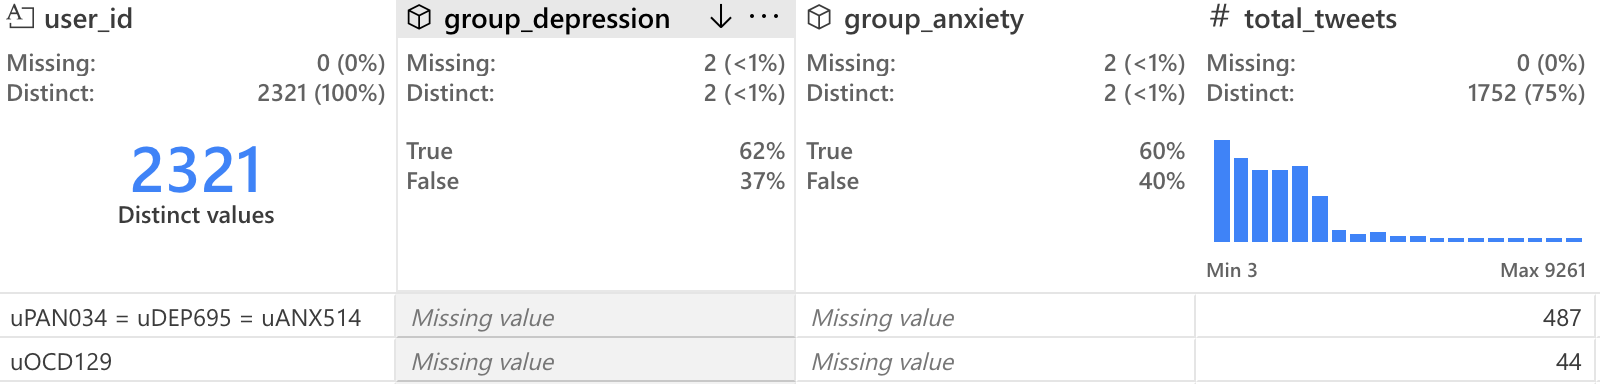

In [15]:
df_export_sliced = df_export.iloc[:,:11]
df_cat = pd.concat([df_export_sliced, df_categorized], axis=1, join='inner')
df_cat.dropna(inplace=True)

In [16]:
print(df_export_sliced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, 0 to 2320
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   group_depression  2320 non-null   int64  
 1   group_anxiety     2320 non-null   int64  
 2   user_id           2320 non-null   object 
 3   total_tweets      2320 non-null   int64  
 4   ANEW_Valence      2320 non-null   float64
 5   ANEW_Dominance    2320 non-null   float64
 6   ANEW_Arousal      2320 non-null   float64
 7   Happiness         2320 non-null   float64
 8   Afinn_Valence     2320 non-null   float64
 9   OpinionFinder     2320 non-null   float64
 10  VADER             2320 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 217.5+ KB
None


In [17]:
print(df_cat.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2320 entries, 0 to 2320
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group_depression                2320 non-null   int64  
 1   group_anxiety                   2320 non-null   int64  
 2   user_id                         2320 non-null   object 
 3   total_tweets                    2320 non-null   int64  
 4   ANEW_Valence                    2320 non-null   float64
 5   ANEW_Dominance                  2320 non-null   float64
 6   ANEW_Arousal                    2320 non-null   float64
 7   Happiness                       2320 non-null   float64
 8   Afinn_Valence                   2320 non-null   float64
 9   OpinionFinder                   2320 non-null   float64
 10  VADER                           2320 non-null   float64
 11  Labeling and Mislabeling        2320 non-null   float64
 12  Fortune-telling                 2320 no

In [18]:
df_export.to_csv('df_agg.csv', index=False)
df_cat.to_csv('df_categorized.csv', index=False)

In [19]:
df_train, df_test = train_test_split(df_export, test_size=0.2, stratify=df_export[['group_anxiety', 'group_depression']], random_state=26)

# Extract X, y, user_id from df_train
X_train = df_train.drop(columns=['user_id', 'group_anxiety', 'group_depression'])
y_train = df_train[['group_anxiety', 'group_depression']]

# Extract X, y, user_id from df_test
X_test = df_test.drop(columns=['user_id', 'group_anxiety', 'group_depression'])
y_test = df_test[['group_anxiety', 'group_depression']]

In [21]:
df_train.to_csv('train/df_train.csv', index=False)
df_test.to_csv('test/df_test.csv', index=False)
X_train.to_csv('train/X_train.csv', index=False)
y_train.to_csv('train/y_train.csv', index=False)
X_test.to_csv('test/X_test.csv', index=False)
y_test.to_csv('test/y_test.csv', index=False)

In [22]:
df_train_cat, df_test_cat = train_test_split(df_cat, test_size=0.2, stratify=df_export[['group_anxiety', 'group_depression']], random_state=26)

# Extract X, y, user_id from df_train
X_train_cat = df_train_cat.drop(columns=['user_id', 'group_anxiety', 'group_depression'])
y_train_cat = df_train_cat[['group_anxiety', 'group_depression']]

# Extract X, y, user_id from df_test
X_test_cat = df_test_cat.drop(columns=['user_id', 'group_anxiety', 'group_depression'])
y_test_cat = df_test_cat[['group_anxiety', 'group_depression']]

In [23]:
df_train_cat.to_csv('train/df_train_cat.csv', index=False)
df_test_cat.to_csv('test/df_test_cat.csv', index=False)
X_train_cat.to_csv('train/X_train_cat.csv', index=False)
y_train_cat.to_csv('train/y_train_cat.csv', index=False)
X_test_cat.to_csv('test/X_test_cat.csv', index=False)
y_test.to_csv('test/y_test_cat.csv', index=False)